In [72]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Data importing and normalization.

In [73]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [74]:
x_train = train.loc[:, train.columns != 'label'] 
y_train = train['label']

In [75]:
x_test = test.loc[:, test.columns != 'label']
y_test = test['label']

In [76]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, x_test = x_train / 255.0, x_test / 255.0

In [92]:
enc = OneHotEncoder()

y_train = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

In [93]:
x_test.shape
x_train.shape
y_test.shape
y_train.shape

(10000, 784)

(60000, 784)

(10000, 10)

(60000, 10)

In [96]:
x_train
y_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,0.000000,0.411765,0.360784,0.396078,0.419608,...,0.839216,0.639216,0.572549,0.647059,0.309804,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,0.447059,0.717647,0.439216,0.215686,0.090196,...,0.270588,0.203922,0.176471,0.290196,0.152941,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.180392,0.000000,0.082353,...,0.576471,0.564706,0.474510,0.400000,0.247059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.325490,0.607843,0.533333,0.454902,0.580392,...,0.000000,0.000000,0.333333,0.623529,0.000000,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.003922,0.000000,0.000000,0.341176,0.447059,...,0.678431,0.682353,0.678431,0.694118,0.643137,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

## 1.1 Logistic Regression (sklearn)


In [80]:
logisticRegr = LogisticRegression()

lg_X_train = np.array(x_train)
lg_X_test = np.array(x_test)
y_train = train['label']
y_test = test['label']

In [81]:
lg_X_test.shape
y_train.shape

(10000, 784)

(60000,)

In [82]:
logisticRegr.fit(lg_X_train, y_train)
predictions = logisticRegr.predict(lg_X_test)

C:\Users\chdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_test[70:71]
logisticRegr.predict(lg_X_test[70:71])
## it works...

70    7
Name: label, dtype: int64

array([7], dtype=int64)

In [84]:
score = logisticRegr.score(lg_X_test, test['label'])
print('\nТочность на проверочных данных, используя Logistic Regression: {}'.format(score))


Точность на проверочных данных, используя Logistic Regression: 0.8565


## 1.2 Logistic Regression (tensorflow)

In [97]:
lr_model = tf.keras.models.Sequential()
lr_model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,)))

In [98]:
lr_model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [99]:
lr_rez = lr_model.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 1s 6ms/step - loss: 1.6780 - accuracy: 0.4911 - val_loss: 1.2847 - val_accuracy: 0.6407
Epoch 2/25
120/120 [==============================] - 0s 3ms/step - loss: 1.1429 - accuracy: 0.6622 - val_loss: 1.0373 - val_accuracy: 0.6773
Epoch 3/25
120/120 [==============================] - 0s 3ms/step - loss: 0.9765 - accuracy: 0.6906 - val_loss: 0.9265 - val_accuracy: 0.6993
Epoch 4/25
120/120 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.7135 - val_loss: 0.8607 - val_accuracy: 0.7221
Epoch 5/25
120/120 [==============================] - 0s 3ms/step - loss: 0.8351 - accuracy: 0.7298 - val_loss: 0.8152 - val_accuracy: 0.7374
Epoch 6/25
120/120 [==============================] - 0s 3ms/step - loss: 0.7956 - accuracy: 0.7446 - val_loss: 0.7814 - val_accuracy: 0.7486
Epoch 7/25
120/120 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.7557 - val_loss: 0.7544 - val_accuracy: 0.7601
Epoch 

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

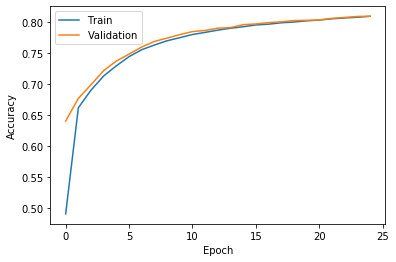

In [103]:
plt.plot(lr_rez.history['accuracy'])
plt.plot(lr_rez.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [105]:
loss_LR, accuracy_LR = lr_model.evaluate(x_test, y_test, verbose=0)
print('\nТочность на проверочных данных, используя LR: {},\nLoss на проверочных данных, используя LR: {}'.format(accuracy_LR, loss_LR))


Точность на проверочных данных, используя LR: 0.8095999956130981,
Loss на проверочных данных, используя LR: 0.5874292254447937


## 2. NN

In [7]:
model_NN = tf.keras.models.Sequential()

model_NN.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model_NN.add(tf.keras.layers.Dropout(0.2))
model_NN.add(tf.keras.layers.Dense(512, activation='relu'))
model_NN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model_NN.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history_NN = model_NN.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 2s 17ms/step - loss: 0.5831 - accuracy: 0.7952 - val_loss: 0.4111 - val_accuracy: 0.8568
Epoch 2/25
120/120 [==============================] - 2s 16ms/step - loss: 0.3912 - accuracy: 0.8601 - val_loss: 0.3704 - val_accuracy: 0.8678
Epoch 3/25
120/120 [==============================] - 3s 25ms/step - loss: 0.3502 - accuracy: 0.8721 - val_loss: 0.3336 - val_accuracy: 0.8812
Epoch 4/25
120/120 [==============================] - 3s 27ms/step - loss: 0.3301 - accuracy: 0.8799 - val_loss: 0.3329 - val_accuracy: 0.8795
Epoch 5/25
120/120 [==============================] - 2s 16ms/step - loss: 0.3081 - accuracy: 0.8877 - val_loss: 0.3119 - val_accuracy: 0.8842
Epoch 6/25
120/120 [==============================] - 3s 25ms/step - loss: 0.2945 - accuracy: 0.8913 - val_loss: 0.3106 - val_accuracy: 0.8824
Epoch 7/25
120/120 [==============================] - 4s 30ms/step - loss: 0.2848 - accuracy: 0.8965 - val_loss: 0.2972 - val_accuracy: 0.8913

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

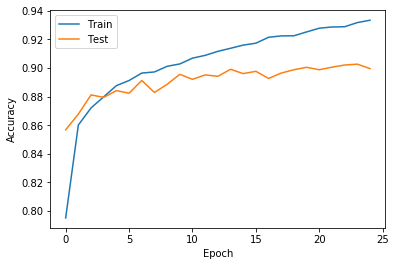

In [10]:
ax = plt.figure().gca()

plt.plot(history_NN.history['accuracy'])
plt.plot(history_NN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [11]:
#проверим предсказание нейронки на 70ой вещи в датасете
x_test[70:71]
y_test[70:71]
model_NN.predict(x_test[70:71])
# она предсказала верно

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

array([[2.0873527e-07, 8.2208669e-07, 9.7307272e-08, 6.5190255e-07,
        2.7113383e-06, 8.1970805e-04, 1.7670512e-06, 9.9874508e-01,
        9.7745251e-06, 4.1926143e-04]], dtype=float32)

In [12]:
testNN_loss, testNN_acc = model_NN.evaluate(x_test,  y_test, verbose=2)
testNN_loss, testNN_acc = round(testNN_loss,3), round(testNN_acc, 3)

print('\nТочность на проверочных данных, используя NN: {},\nLoss на проверочных данных, используя NN: {}'.format(testNN_acc, testNN_loss))

313/313 - 0s - loss: 0.2991 - accuracy: 0.8996

Точность на проверочных данных, используя NN: 0.9,
Loss на проверочных данных, используя NN: 0.299


## 3. CNN

In [65]:
CNN_X_train = np.array(x_train)
CNN_X_test = np.array(x_test)
CNN_X_train = CNN_X_train.reshape(60000, 28, 28, 1)
CNN_X_test = CNN_X_test.reshape(10000, 28, 28, 1)

In [66]:
model_CNN = tf.keras.models.Sequential()

model_CNN.add(tf.keras.layers.Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model_CNN.add(tf.keras.layers.MaxPooling2D(3,3))
model_CNN.add(tf.keras.layers.Convolution2D(64, kernel_size=3, activation='relu'))
model_CNN.add(tf.keras.layers.MaxPooling2D(3,3))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [67]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
history_CNN = model_CNN.fit(
    CNN_X_train,
    y_train,
    batch_size=500,
    validation_data=(CNN_X_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 16s 135ms/step - loss: 1.0235 - accuracy: 0.6639 - val_loss: 0.5999 - val_accuracy: 0.7754
Epoch 2/25
120/120 [==============================] - 17s 140ms/step - loss: 0.5424 - accuracy: 0.7979 - val_loss: 0.4866 - val_accuracy: 0.8244
Epoch 3/25
120/120 [==============================] - 17s 143ms/step - loss: 0.4581 - accuracy: 0.8372 - val_loss: 0.4229 - val_accuracy: 0.8498
Epoch 4/25
120/120 [==============================] - 17s 143ms/step - loss: 0.4115 - accuracy: 0.8536 - val_loss: 0.3924 - val_accuracy: 0.8641
Epoch 5/25
120/120 [==============================] - 17s 143ms/step - loss: 0.3819 - accuracy: 0.8648 - val_loss: 0.3688 - val_accuracy: 0.8674
Epoch 6/25
120/120 [==============================] - 17s 143ms/step - loss: 0.3637 - accuracy: 0.8720 - val_loss: 0.3487 - val_accuracy: 0.8761
Epoch 7/25
120/120 [==============================] - 18s 154ms/step - loss: 0.3454 - accuracy: 0.8774 - val_loss: 0.3452 - val_ac

In [71]:
testСNN_loss, testСNN_acc = model_CNN.evaluate(CNN_X_test,  y_test, verbose=2)
testСNN_loss, testСNN_acc = round(testСNN_loss,3), round(testСNN_acc, 3)

print('\nТочность на проверочных данных, используя СNN: {},\nLoss на проверочных данных, используя СNN: {}'.format(testСNN_acc, testСNN_loss))

313/313 - 2s - loss: 0.2777 - accuracy: 0.8969

Точность на проверочных данных, используя СNN: 0.897,
Loss на проверочных данных, используя СNN: 0.278


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

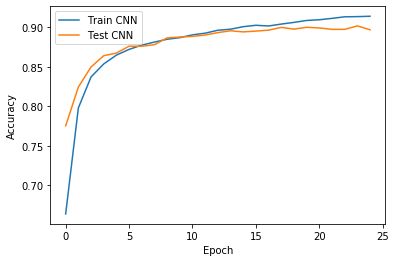

In [70]:
ax = plt.figure().gca()

plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train CNN', 'Test CNN'], loc='upper left')

## 2nd more difficult CNN model

In [59]:
model2_CNN = tf.keras.models.Sequential()

model2_CNN.add(tf.keras.layers.Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model2_CNN.add(tf.keras.layers.MaxPooling2D(2, 2))

model2_CNN.add(tf.keras.layers.Dropout(0.5))
model2_CNN.add(tf.keras.layers.Flatten())
model2_CNN.add(tf.keras.layers.Dense(512, activation='relu'))

model2_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [60]:
model2_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
history2_CNN = model2_CNN.fit(
    CNN_X_train,
    y_train,
    batch_size=500,
    validation_data=(CNN_X_test, y_test),
    epochs=25
)

Epoch 1/25
120/120 [==============================] - 31s 258ms/step - loss: 1.0003 - accuracy: 0.6298 - val_loss: 0.6192 - val_accuracy: 0.7657
Epoch 2/25
120/120 [==============================] - 31s 258ms/step - loss: 0.6303 - accuracy: 0.7673 - val_loss: 0.5230 - val_accuracy: 0.8083
Epoch 3/25
120/120 [==============================] - 31s 258ms/step - loss: 0.5521 - accuracy: 0.7981 - val_loss: 0.4725 - val_accuracy: 0.8231
Epoch 4/25
120/120 [==============================] - 31s 255ms/step - loss: 0.5078 - accuracy: 0.8156 - val_loss: 0.4445 - val_accuracy: 0.8304
Epoch 5/25
120/120 [==============================] - 31s 256ms/step - loss: 0.4722 - accuracy: 0.8282 - val_loss: 0.4003 - val_accuracy: 0.8524
Epoch 6/25
120/120 [==============================] - 31s 256ms/step - loss: 0.4436 - accuracy: 0.8379 - val_loss: 0.3816 - val_accuracy: 0.8581
Epoch 7/25
120/120 [==============================] - 31s 261ms/step - loss: 0.4196 - accuracy: 0.8457 - val_loss: 0.3607 - val_ac

#### CNNs don't depend on labels, for our dataset the simplest CNN is enough.

In [62]:
test2СNN_loss, test2СNN_acc = model2_CNN.evaluate(CNN_X_test,  y_test, verbose=2)
test2СNN_loss, test2СNN_acc = round(test2СNN_loss,3), round(test2СNN_acc, 3)

print('\nТочность на проверочных данных, используя СNN: {},\nLoss на проверочных данных, используя СNN: {}'.format(test2СNN_acc, test2СNN_loss))

313/313 - 2s - loss: 0.2685 - accuracy: 0.9006

Точность на проверочных данных, используя СNN: 0.901,
Loss на проверочных данных, используя СNN: 0.268


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

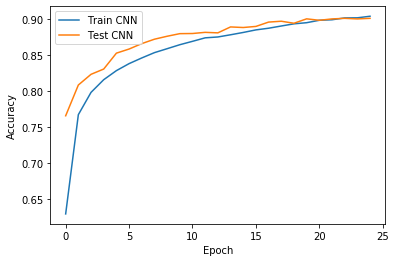

In [64]:
ax = plt.figure().gca()

plt.plot(history2_CNN.history['accuracy'])
plt.plot(history2_CNN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train CNN', 'Test CNN'], loc='upper left')

Learning process for CNN model is longer but more accurate than for NN and Logistic Regression.
Logistic regression results much less than results of CNN & NN.
Difference between CNN and NN is not bigger, but in our situation predictions from CNN model is more accurate than in NN (about 1 percent for each learning process)